<a href="https://colab.research.google.com/github/KOZlegend/Dark-Matter/blob/Gravitational-Waves/GravitationalWave_200311_115853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install gwpy # install python package for gravitational waves

The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [ ]:
# # -- Set a GPS time:
t0 = 1267963151.3 # GW200311_115853

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 16.0, t0 + 16.0) # grab time series centered on t0 and 32 days away from t0

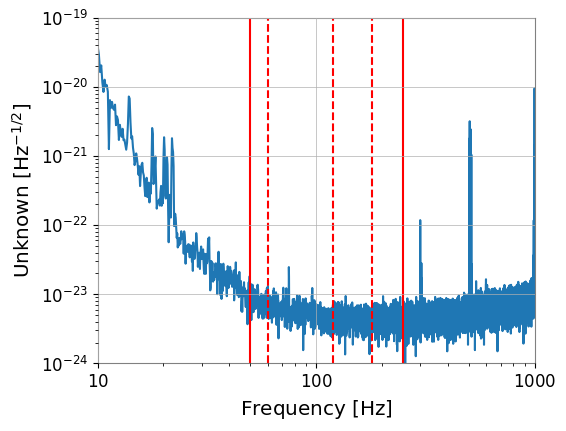

In [ ]:
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd(fftlength=8).plot() # use frequency analysis to get frequency and power of frequency
plt.xlim(10,1000) # plot between 10 and 1000 Hertz
ymin = 1e-24 # set minimum power of frequency to 10^-24
ymax = 1e-19 # set maximum power of frequency to 10^-19
plt.ylim(ymin, ymax) # plot y
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red") # add vertical line at A/C current frequency
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red") # add vertical line at A/C current frequency
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red") # add vertical line at A/C current frequency

plt.vlines(50, ymin, ymax, linestyle="solid", color="red") # add line of minimum limit of 50 Hertz
plt.vlines(250, ymin, ymax, linestyle="solid", color="red") # add line of minimum limit of 250 Hertz

In [ ]:
from gwpy.signal import filter_design # add filter
bp = filter_design.bandpass(50, 250, hdata.sample_rate) # set frequency window

notches = [filter_design.notch(line, hdata.sample_rate) for
           line in (60, 65.8, 69.5, 120, 180)] # filter out A/C current frequencies

zpk = filter_design.concatenate_zpks(bp, *notches)

hfilt = hdata.filter(zpk, filtfilt=True) # create filter


In [ ]:
hdata = hdata.crop(*hdata.span.contract(1)) # crop out data
hfilt = hfilt.crop(*hfilt.span.contract(1)) # crop out unwanted frequencies

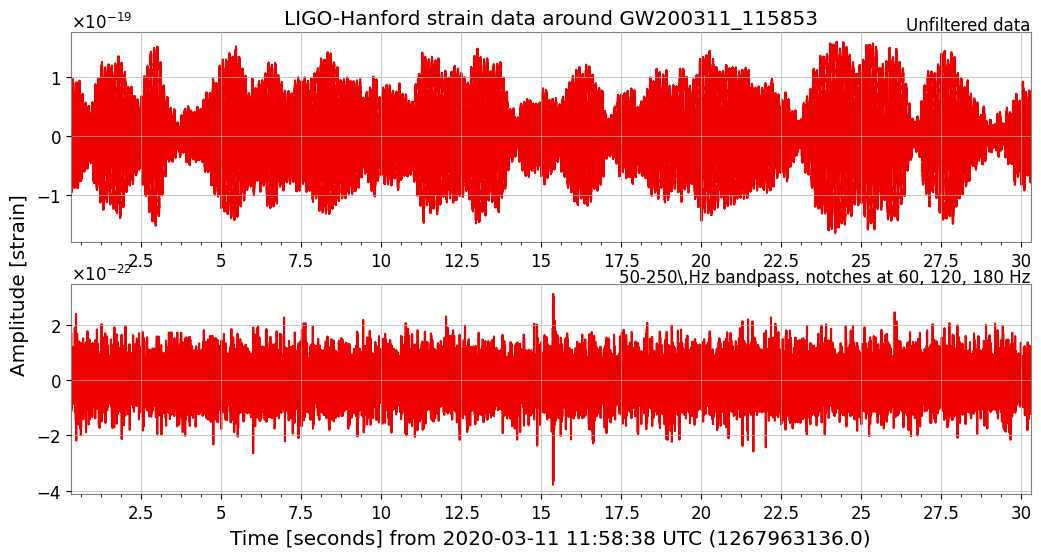

In [ ]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford') # insert filtered data from Hanford
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW200311_115853') # set title
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right') # insert unfiltered data from Hanford
ax1.set_ylabel('Amplitude [strain]', y=-0.2) # label y-axis
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',
         transform=ax2.transAxes, ha='right') # add context
plot.show()

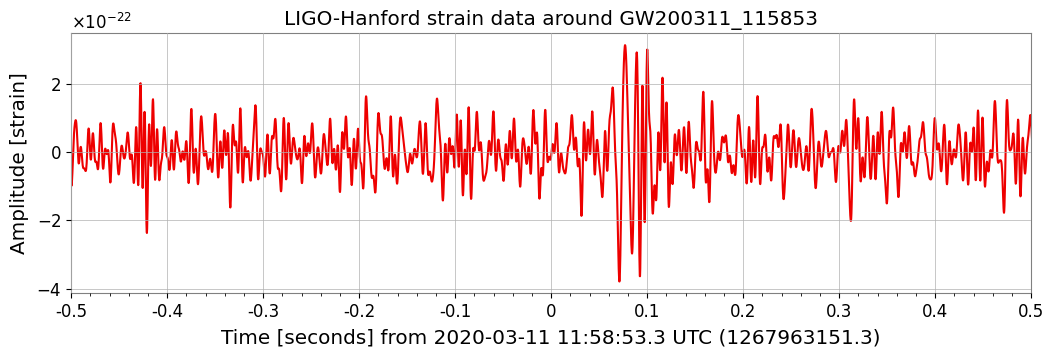

In [ ]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford') # insert filtered data from Hanford
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW200311_115853') # title
ax.set_ylabel('Amplitude [strain]') # y-axis
ax.set_xlim(t0 - 0.5, t0 + 0.5) # set x lower and upper limits
ax.set_xscale('seconds', epoch=t0) # center scale around t0
plot.show()

x_val = plt.gca().lines[0].get_xdata()
y_val = plt.gca().lines[0].get_ydata()


In [ ]:
ldata = TimeSeries.fetch_open_data('L1', t0 - 16, t0 + 16) # get data from Linvingston
lfilt = ldata.filter(zpk, filtfilt=True) # filter Livingston data

In [ ]:
lfilt.shift('6.9ms') # shift by 6.9ms because stations are on different parts of Earth and have different configurations
lfilt *= -1

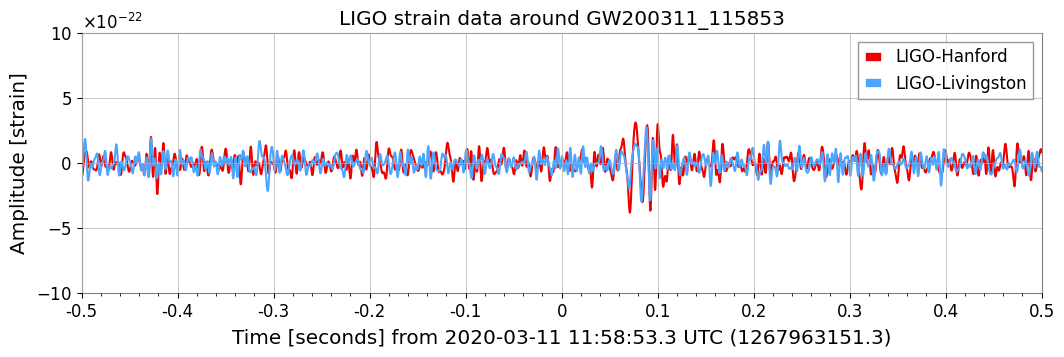

In [ ]:
plot = Plot(figsize=[12, 4])
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford') # plot data from Hanford
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston') # plot data from Livingston
ax.set_title('LIGO strain data around GW200311_115853') # title
ax.set_xlim(t0 - 0.5, t0 + 0.5) # set lower and upper x limits
ax.set_xscale('seconds', epoch=t0) # set scale to seconds
ax.set_ylabel('Amplitude [strain]') # label y-axis
ax.set_ylim(-1e-21, 1e-21) # set y limits
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

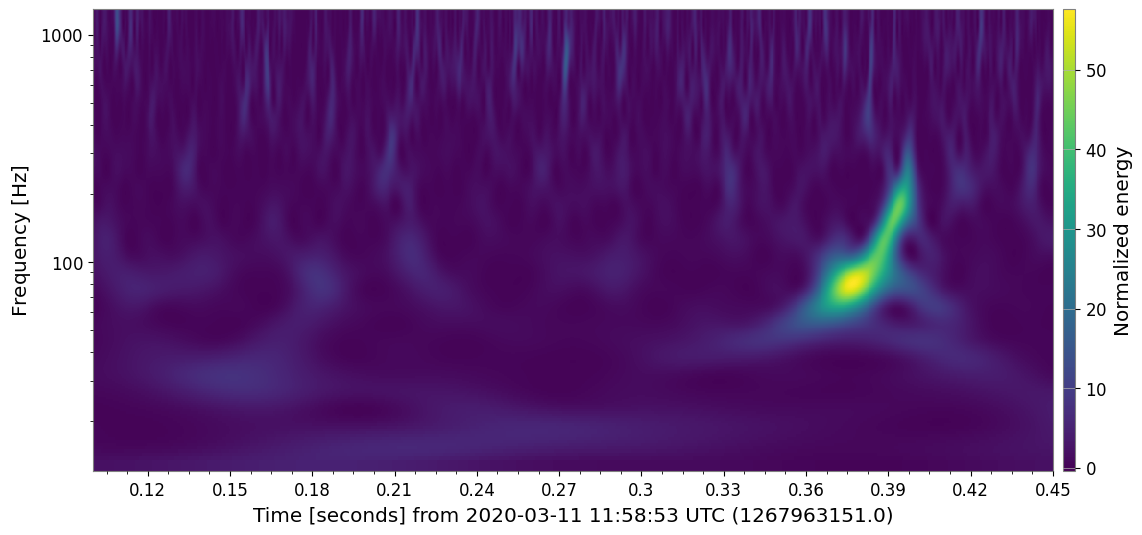

In [ ]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.15)) # plot filtered data on frequency-time graph with color scale
fig4 = hq.plot()
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [ ]:
from scipy.io.wavfile import write # import module to create sound files
import numpy as np

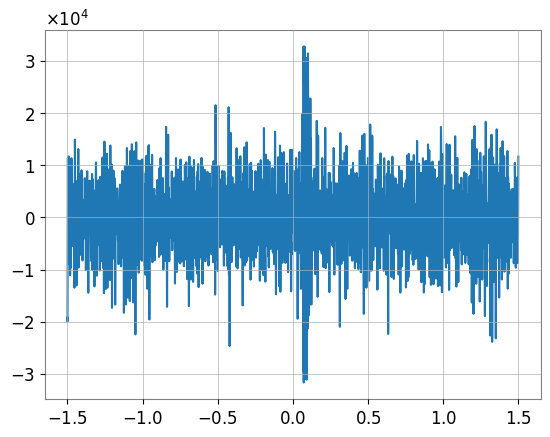

In [ ]:
amplitude = np.iinfo(np.int16).max # define max amplitude

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5))) # x array from Hanford
y = y_val[ind] # y values from Hanford
# y = y**3
y = y / np.max(y) # change y value so max y value is max amplitude
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16)) # plot

In [ ]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0)))) # sampling rate
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16)) # write form

fs =  4096


In [ ]:
from google.colab import files
files.download("example.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-39518.65861580582 32767.0
0.5
fs =  4096


<ipython-input-63-e3ff5ed1a522>:40: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
<ipython-input-63-e3ff5ed1a522>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
<ipython-input-63-e3ff5ed1a522>:55: ComplexWarning: Casting complex values to real discards the imaginary part
  write("example2.wav", fs, (np.array(y) * amplitude).astype(np.int16))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

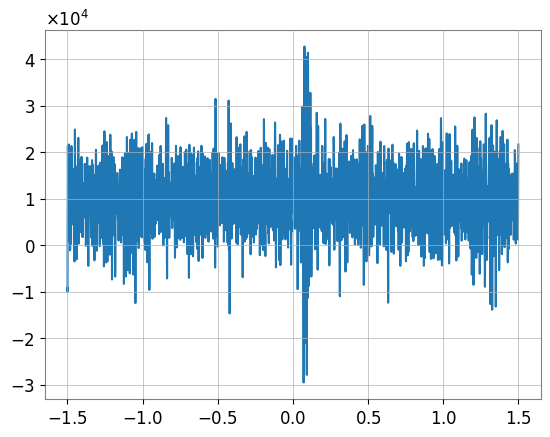

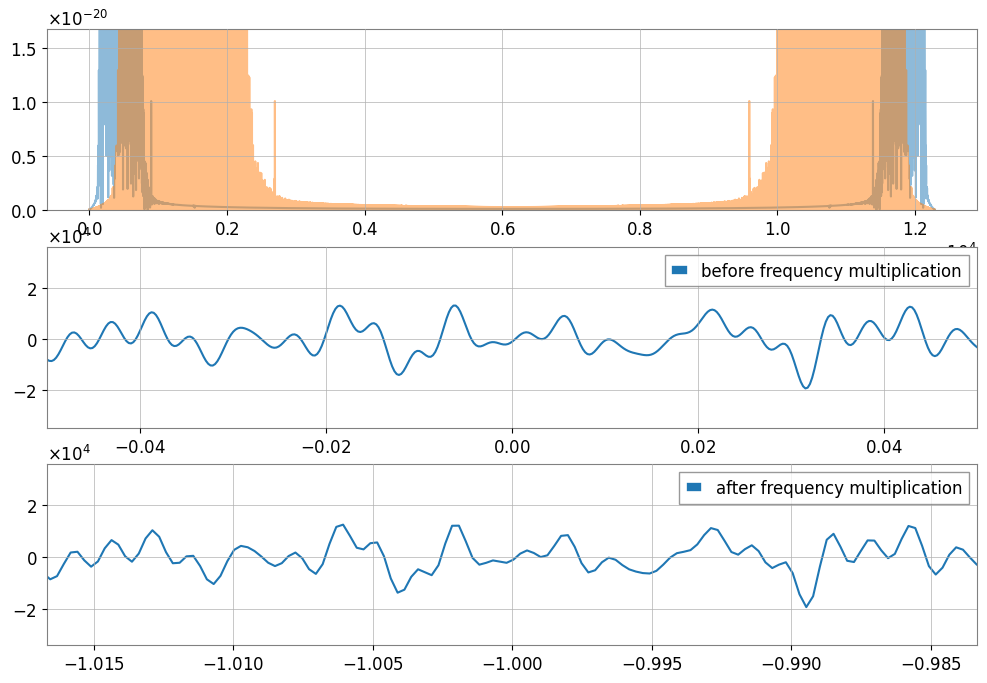

In [ ]:
t_clip = 1.5 # clip so audio is from 1.5 seconds around before and after event
amplitude = np.iinfo(np.int16).max

ind = np.where((x_val < (t0+t_clip)) & (x_val > (t0-t_clip))) # clip data and provide index of array
x = x_val[ind] # assign to x array (time)
y = y_val[ind] # put in array y (amplitude)

plt.plot(x - t0, (np.array(y / np.max(y)) * amplitude) + 10000, label="original") # normalize so maximum of y array is 1
print(np.min(np.array(y / np.max(y)) * amplitude), np.max(np.array(y / np.max(y)) * amplitude))

up_sample = 3 # increase frequency by 3

y_fft = np.fft.fft(y) # create power spectrum (Fourier transform of y)
y_fft_new = np.zeros(np.shape(y_fft), dtype=np.cdouble) # new power spectrum
y_fft_old = y_fft # store old power spectrum

num = len(y_fft) # length of new power spectrum
for i in np.arange(int(num / up_sample)): # for 1/3 of the total length
    y_fft_new[int(i * up_sample)] = y_fft[int(i)] # 1 - 1, assigning y_fft[1] to y_fft_new[3], shifting original frequencys by 3 times

y_old = np.fft.ifft(y_fft_old)

for i in np.arange(num):
  if i > (num / 2):
    y_fft_new[i] = np.conjugate(y_fft_new[int(num) - i])

#y_fft_new = np.fft.fftshift(y_fft_new)
y = np.fft.ifft(y_fft_new)

plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot(np.abs(y_fft_old), alpha=0.5)
plt.plot(np.abs(y_fft_new), alpha=0.5)
ylim = np.percentile(np.abs(y_fft), 95)
plt.ylim(0, ylim)

plt.subplot(312)
# y_old = y_old**3 # to make the signal more distinct from the noise
y_old = y_old / np.max(y_old)
plt.plot(x - t0, (np.array(y_old) * amplitude).astype(np.int16), label="before frequency multiplication")
plt.xlim(-0.05, 0.05)
plt.legend()

plt.subplot(313)
# y = y**3 # to make the signal more distinct from the noise
y = y / np.max(y)
plt.plot(x - t0, (np.array(y) * amplitude).astype(np.int16), label="after frequency multiplication")
plt.xlim(-t_clip + t_clip / up_sample - 0.05 / up_sample, -t_clip + t_clip / up_sample + 0.05 / up_sample)
plt.legend()
print(t_clip / up_sample)

fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))
# fs = fs * 4 # to make the signal higher pitch
print("fs = ", fs)
write("example2.wav", fs, (np.array(y) * amplitude).astype(np.int16))

from google.colab import files
files.download("example2.wav")

Make C

(0.0, 0.1)

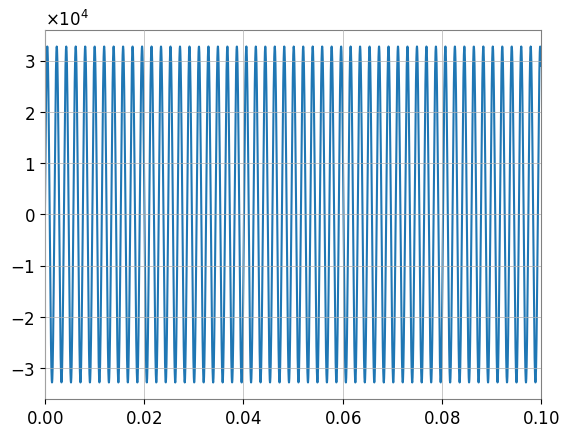

In [ ]:
samplerate = 44100; fs = 261.63 * 2.0 # set frequency of C (higher)
t = np.linspace(0., 1., samplerate) # play for 1 second
amplitude = np.iinfo(np.int16).max # give max amplitude (loudness)
data = amplitude * np.sin(2. * np.pi * fs * t) # create sinusoidal wave
plt.plot(t, data) # plot
plt.xlim(0, 0.1) # set limits from 0 to 0.1 seconds

In [ ]:
write("C.wav", samplerate, data.astype(np.int16)) # write sound file
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>